<h1 style = "text-align:center">CSE375s Course Project - COVID-19 Outcome Prediction</h1>

# 0. Team Members

| Name                                | ID       |
|-------------------------------------|----------|
| Ahmed Haitham Ismail El-Ebidy       | 2101629  |
| Marwan Ahmed Hassen Ali             | 2100902  |
| Ahmed Karam Abdel-Hamid Khalafallah | 2101767  |

# 1. Project Overview

## 1.1 Description

The data used in this project will help to identify whether a person is going to recover from  coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are based on guidelines given by the World Health Organization (WHO). This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number. 

## 1.2 Data Description

The dataset contains 14 major variables that will be having an impact on whether someone has 
recovered or not, the description of each variable are as follows, 
1. Country: where the person resides 
2. Location: which part in the Country  
3. Age: Classification of the age group for each person, based on WHO Age Group Standard  
4. Gender: Male or Female  
5. Visited_Wuhan: whether the person has visited Wuhan, China or not 
6. From_Wuhan: whether the person is from  Wuhan, China or not 
7. Symptoms: there are six families of symptoms that are coded in six fields.  
13.  Time_before_symptoms_appear:  
14.  Result: death (1) or recored (0)   

## 1.3 Project Requirements

It is required to design different classifiers to the predict the outcome (death/recovered) when a new person is admitted to the hospital.<br>**The data is already cleaned and preprocessed.**<br>
You will have to divide the data into three partitions: training, validation, and testing. You need to 
design the following classifiers: 
1. K-Nearest Neighbors 
2. Logistic Regression 
3. Naïve Bayes (due end of week 11) 
4. Decision Trees 
5. Support Vector Machines  (due end of week 14) <br>
For each classifier, try to find the optimal hyperparameters.<br>
You also need to compare the performance of all classifiers using different metrics such as the 
precision, recall, F1-score, and ROC/AUC curves. 

# 2. EDA and Datapreprocessing

## 2.0 Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

## 2.1 Exploratory Data Analysis

In [3]:
## Quick view of the first 5 records
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [5]:
# We can drop the first column since it carries no information
df = df.drop(df.columns[0],axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


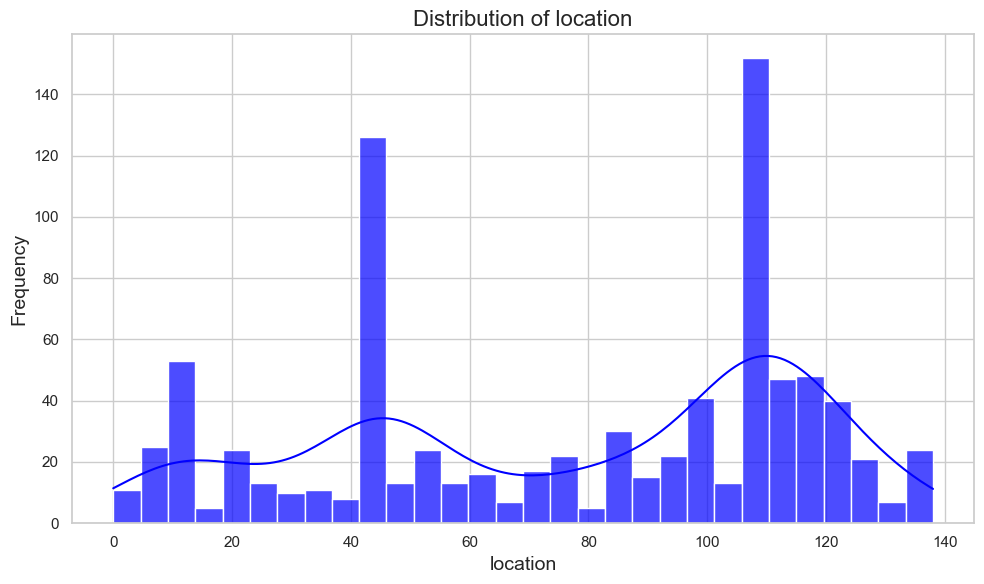

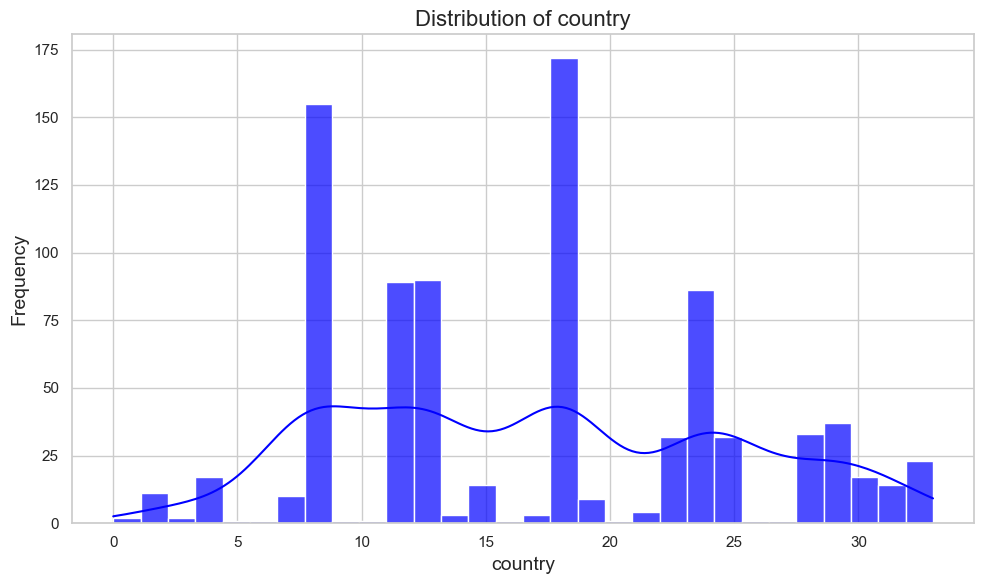

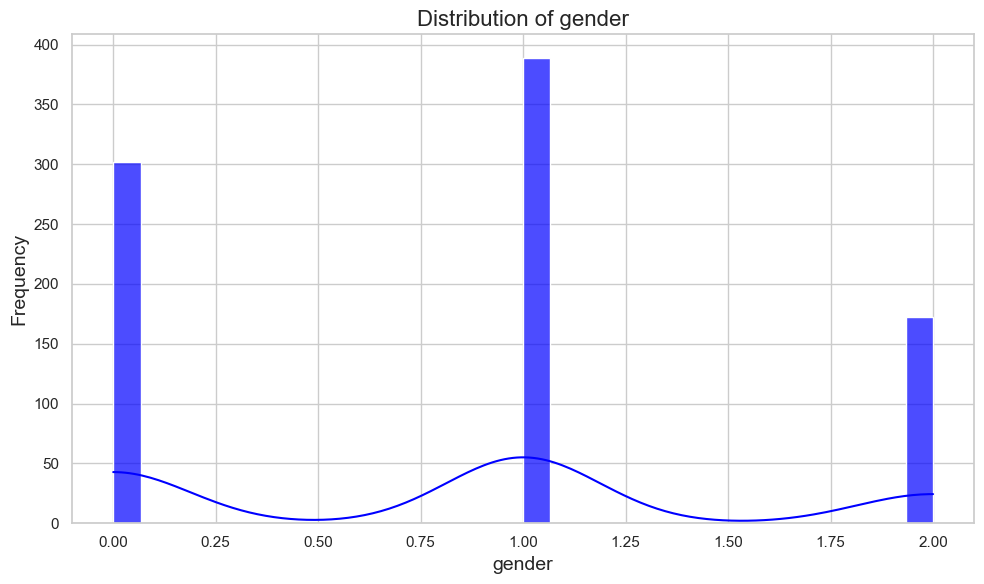

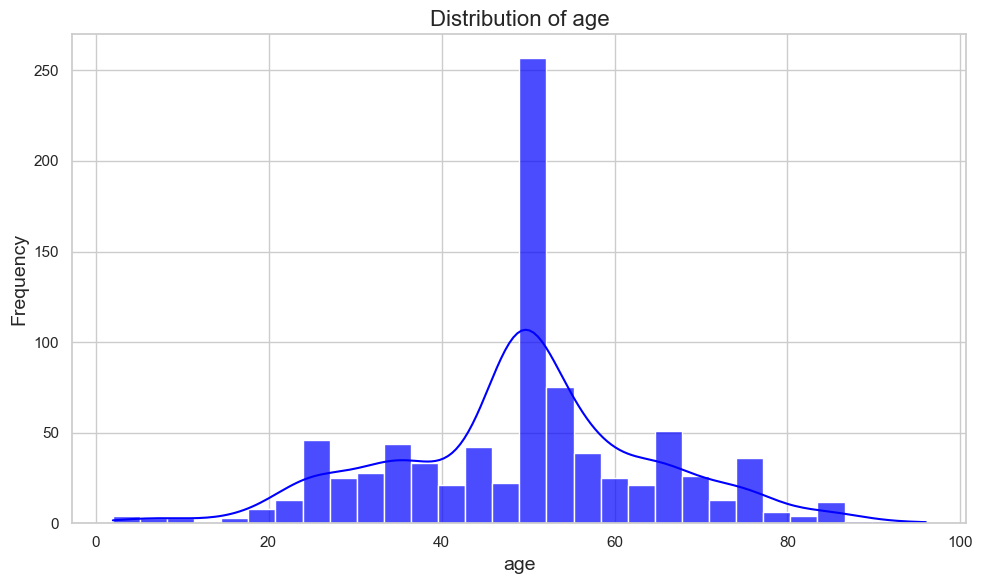

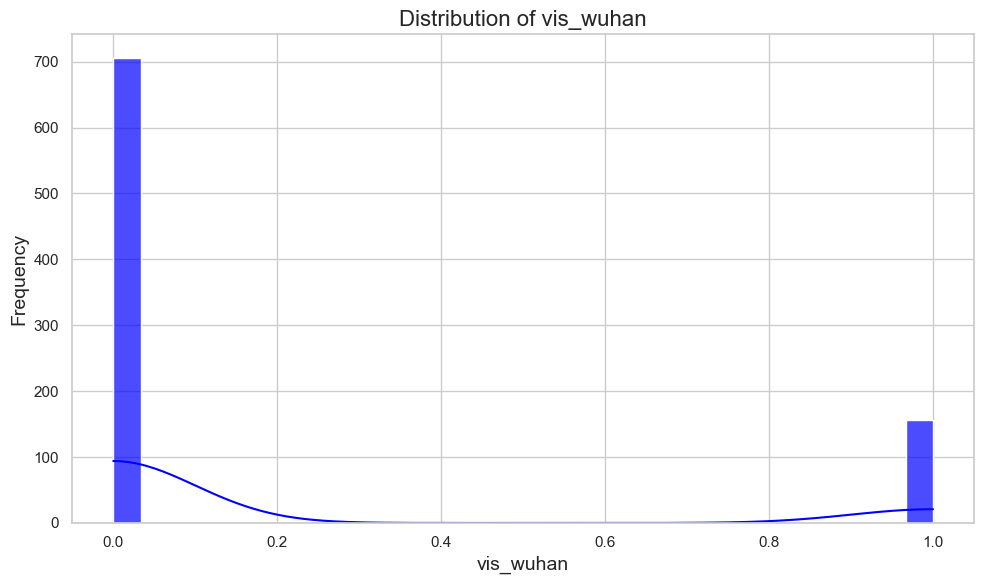

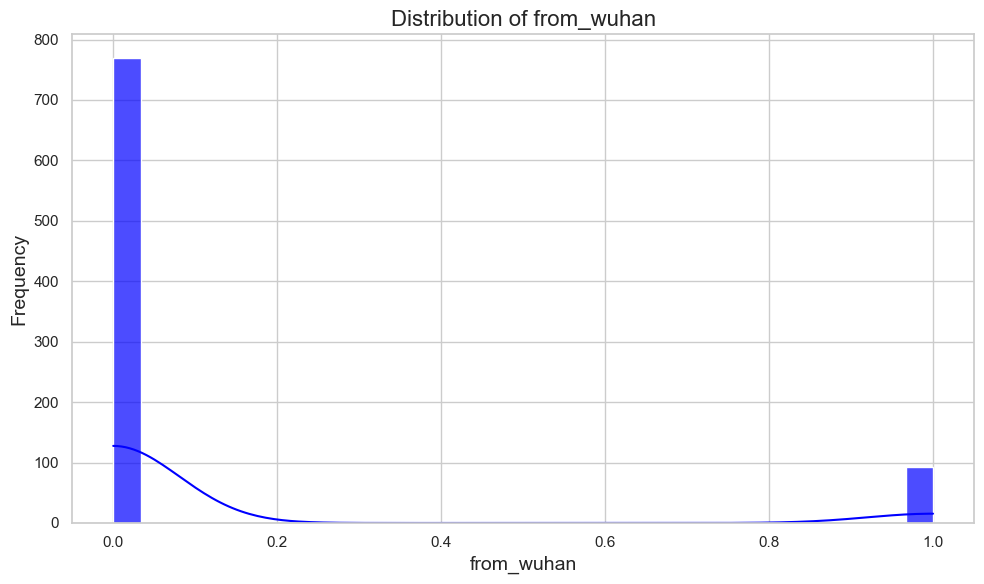

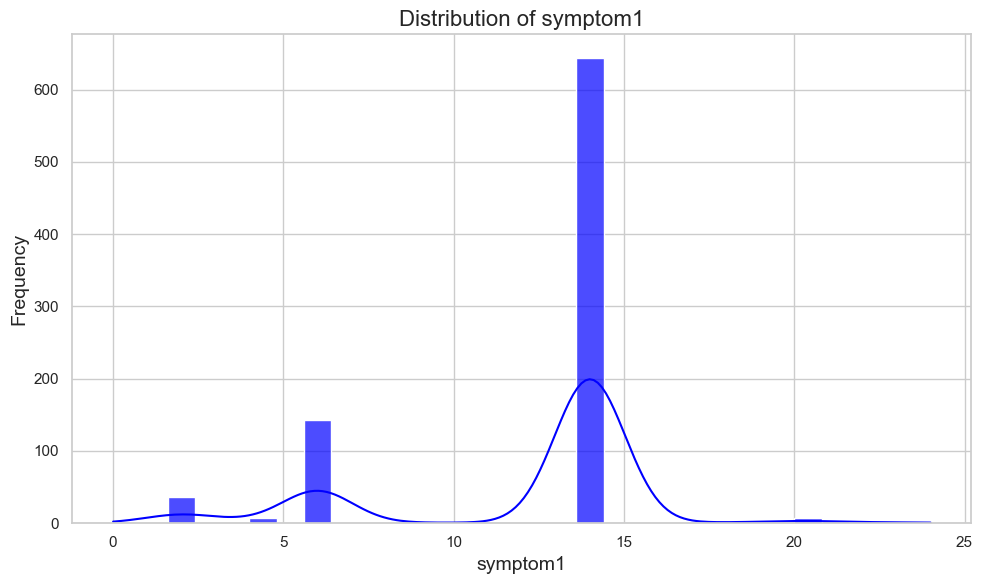

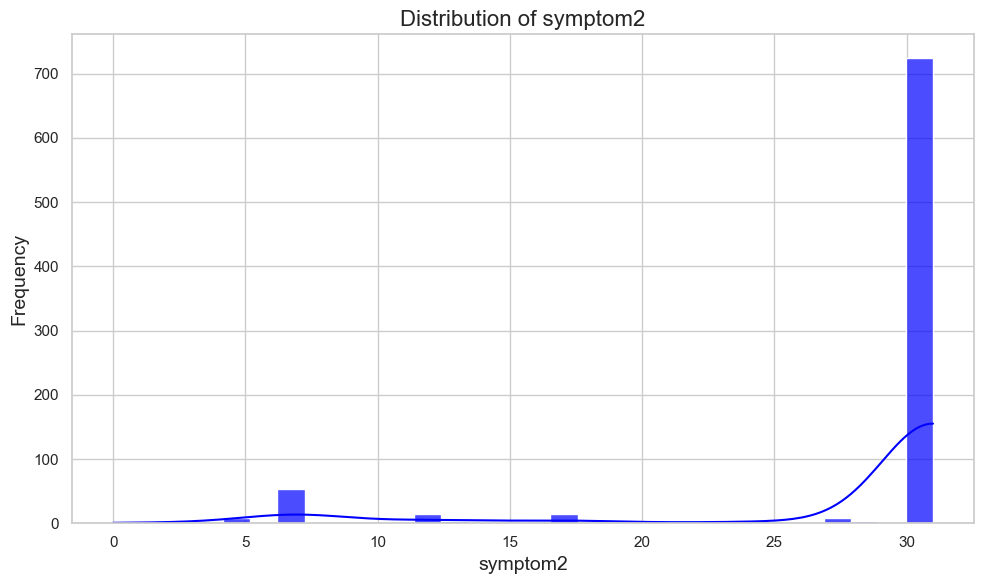

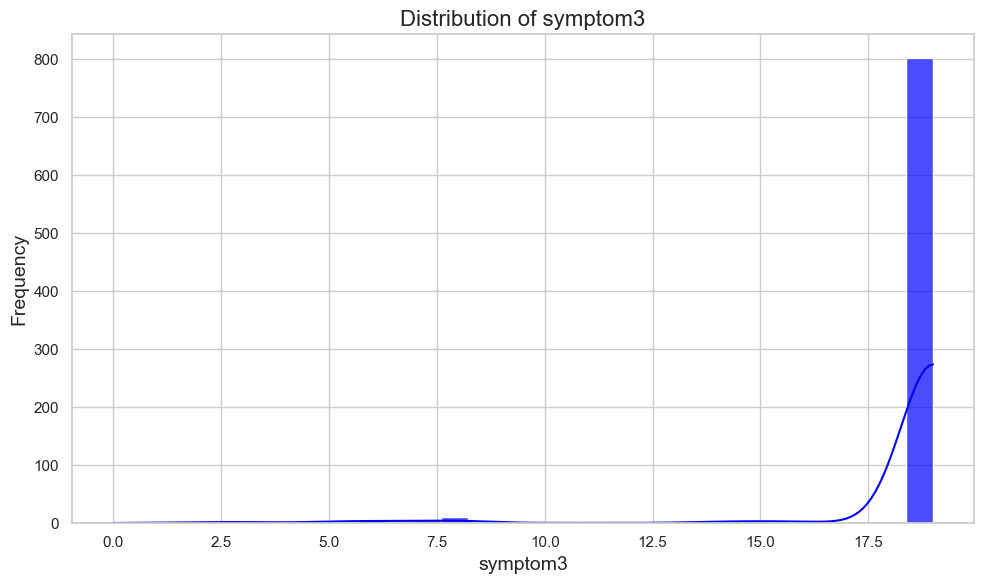

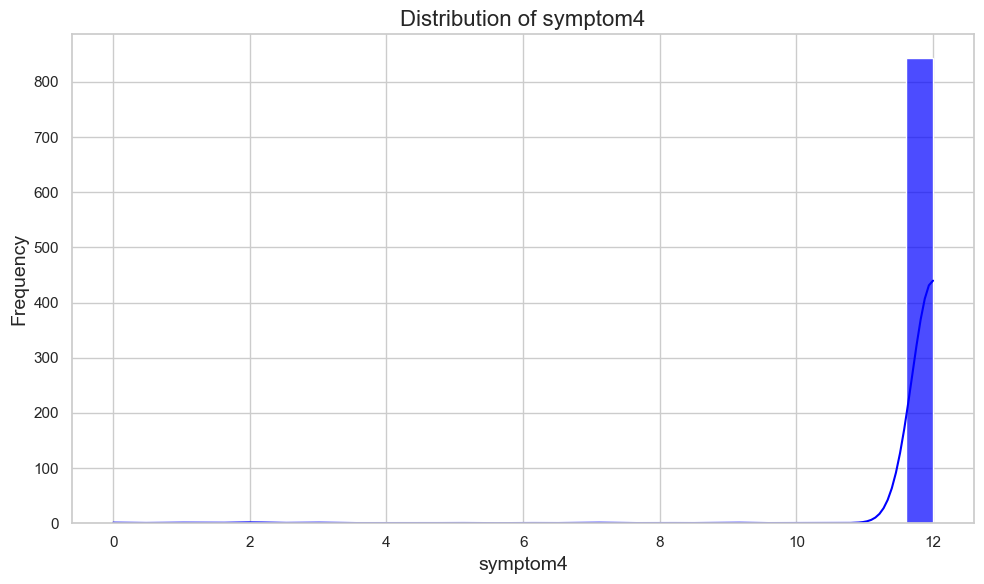

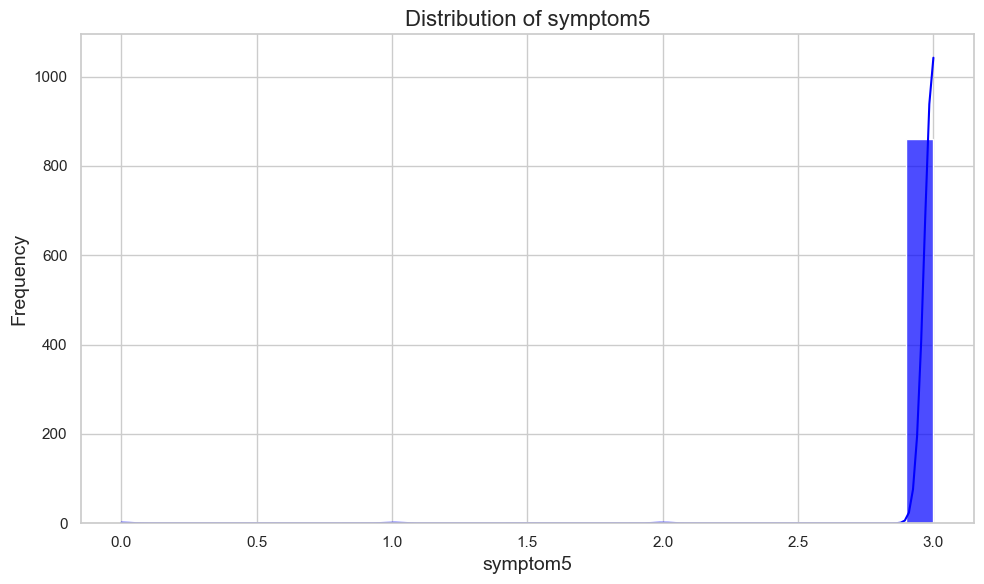

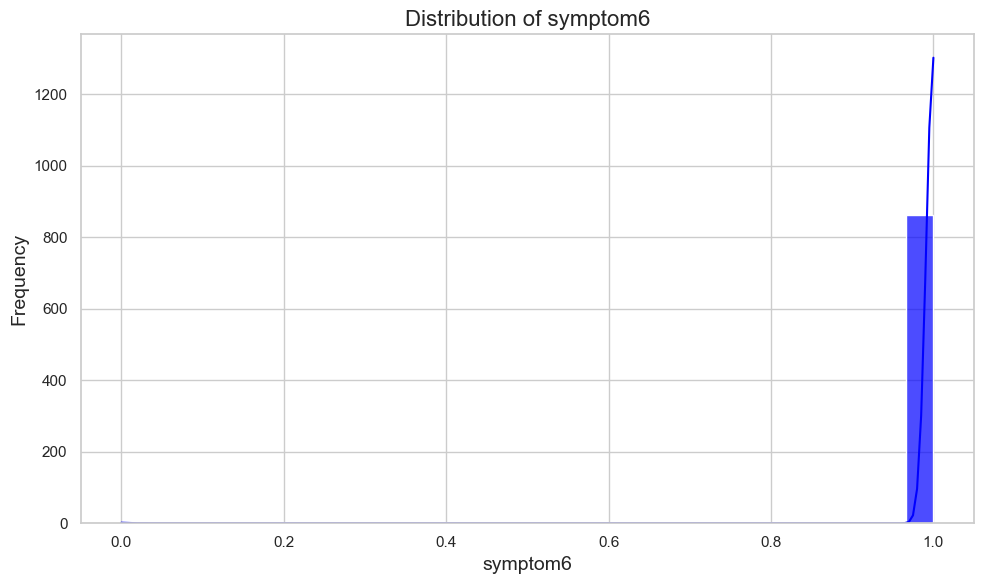

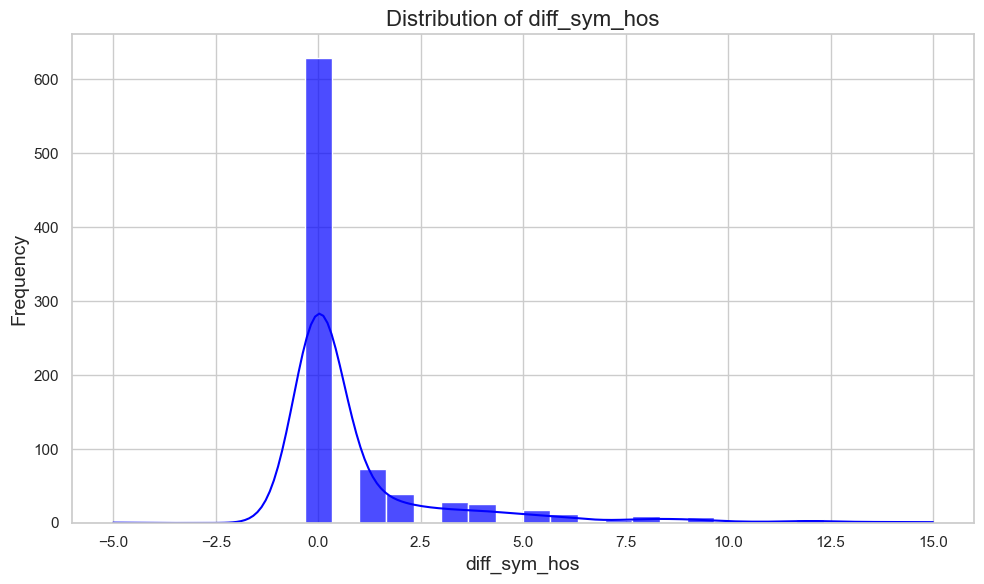

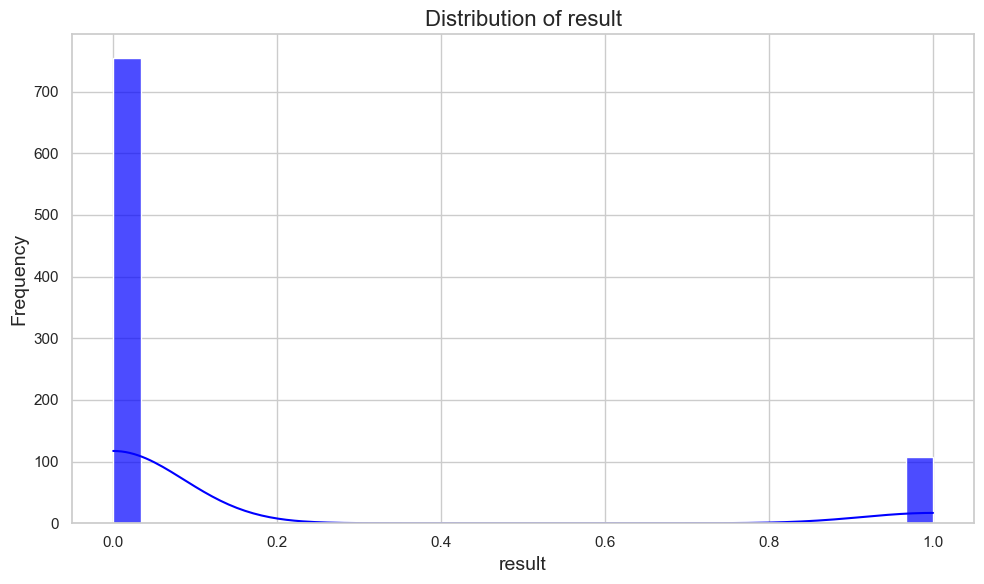

In [7]:
# Set up the plotting style
sns.set(style="whitegrid")

# Loop through all numerical features in the dataframe
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram with KDE
    sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
    
    # Set the title and labels
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [8]:
# Replacing gender values of 2 with the most common gender
df['gender'] = df['gender'].mask(df['gender'] == 2, 1)

## 2.2 Scaling and Transformation

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Standardize all features to have values between 0 and 1
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

## 2.3 Creating Train-Test-Validate Split

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(columns=['result'])
y = df['result']

# Create train, validation, and test splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 604 samples
Validation set: 129 samples
Test set: 130 samples


# 3. Modelling

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
metrics = {}

In [12]:
from sklearn.metrics import roc_curve
import numpy as np

def get_threshold_at_tpr(model, X_val, y_val, target_tpr):
    """
    Find the probability threshold that achieves the closest True Positive Rate (TPR)
    to the target_tpr at the lowest False Positive Rate (FPR).

    You should plot the ROC curve to choose the threshold you wish to operate at.
    
    Parameters:
    - model: The trained model (e.g., LogisticRegression, KNeighborsClassifier, etc.)
    - X_val: The validation feature data
    - y_val: The true labels for the validation data
    - target_tpr: The desired True Positive Rate (TPR) to achieve

    Returns:
    - best_threshold: The threshold that achieves the closest TPR at the lowest FPR
    """
    # Step 1: Get the predicted probabilities
    y_val_prob = model.predict_proba(X_val)[:, 1]  # For binary classification, use the probability of the positive class
    
    # Step 2: Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    
    # Step 3: Find the threshold that gives the closest TPR to the target TPR
    tpr_diff = np.abs(tpr - target_tpr)  # Find the difference between target TPR and all TPRs in the ROC curve
    closest_idx = np.argmin(tpr_diff)  # Find the index where the difference is minimum
    
    # Step 4: Get the corresponding threshold and FPR at that point
    best_threshold = thresholds[closest_idx]
    best_fpr = fpr[closest_idx]
    
    return best_threshold

## 3.1 K-Nearest Neighbors

### 3.1.1 Building Base Model With GridSearch for Best K

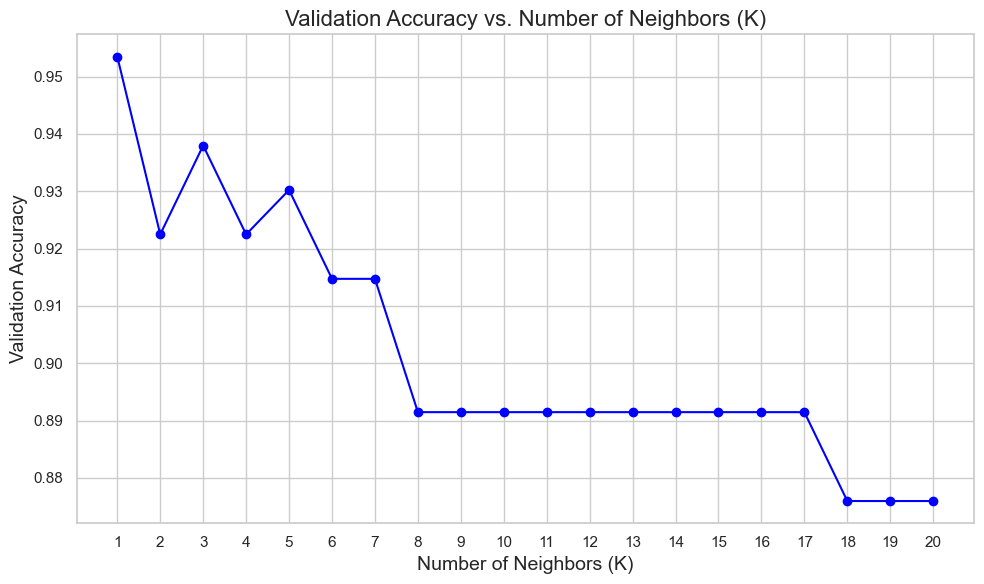

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Perform grid search over K and track best parameters
k_values = range(1, 21)
validation_accuracies = []
best_k = None
best_accuracy = 0
best_KNN = None  # Store the best model

#grid search loop
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(acc)
    
    # Track best accuracy and the corresponding k value
    if acc > best_accuracy:
        best_k = k
        best_accuracy = acc
        best_knn = knn  # Update the best model

# Plot accuracies over different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_accuracies, marker='o', linestyle='-', color='blue')
plt.title('Validation Accuracy vs. Number of Neighbors (K)', fontsize=16)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
print(f"Best K: {best_k} with Validation Accuracy: {best_accuracy:.4f}")

Best K: 1 with Validation Accuracy: 0.9535


### 3.1.2 ROC Curve and Choosing the Best Threshold

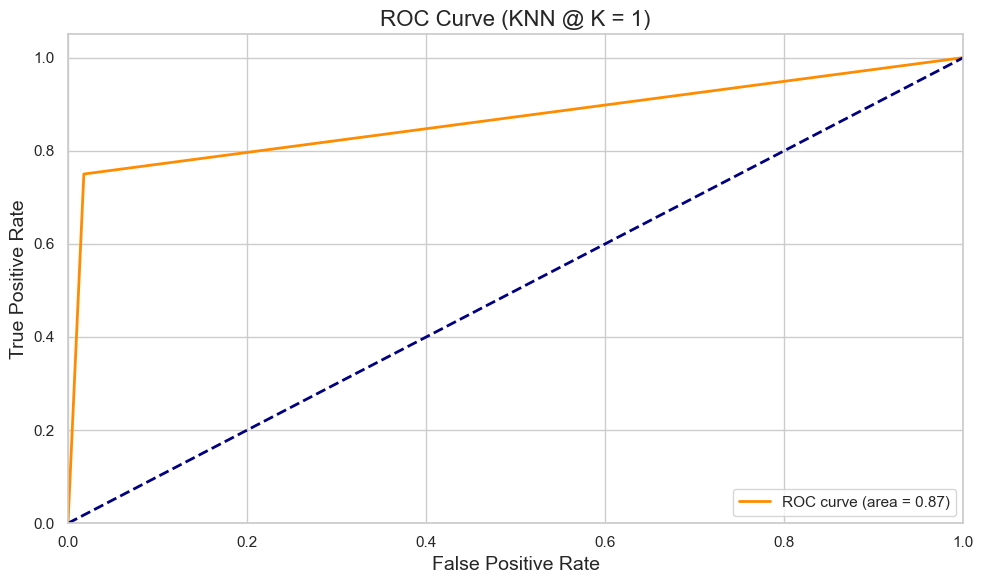

In [15]:
# Predict on the validation set
y_val_pred_KNN = best_knn.predict(X_val)
y_val_prob_KNN = best_knn.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC for the KNN model
fpr_KNN, tpr_KNN, _ = roc_curve(y_val, y_val_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

# Plot ROC curve for the best model
plt.figure(figsize=(10, 6))
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_KNN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve (KNN @ K = 1)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Lets choose the threshold such that the TPR is around 0.8 

### 3.1.3 Building the Model with the Best Threshold

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       113
         1.0       0.86      0.75      0.80        16

    accuracy                           0.95       129
   macro avg       0.91      0.87      0.89       129
weighted avg       0.95      0.95      0.95       129

  ROC AUC: 0.8662
--------------------------------------------------


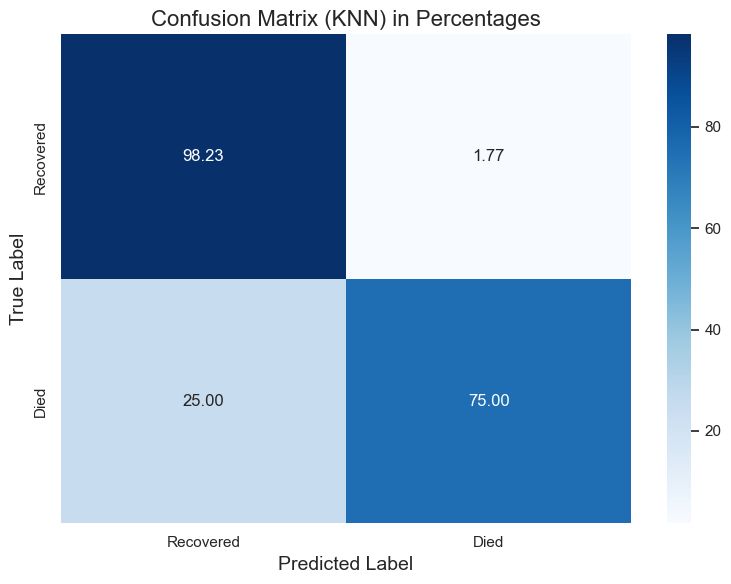

In [16]:
# Step 1: Get the best threshold using the previously defined function
knn_best_threshold = get_threshold_at_tpr(best_knn, X_val, y_val, 0.8)

# Step 2: Get the predicted probabilities from the model
y_val_prob_knn = best_knn.predict_proba(X_val)[:, 1]

# Save metrics for the best model
y_val_pred_knn = (y_val_prob_knn >= knn_best_threshold).astype(int)
y_val_prob_knn = best_knn.predict_proba(X_val)[:, 1]

# Calculate metrics for the best model
accuracy_best = accuracy_score(y_val, y_val_pred_knn)
precision_best = precision_score(y_val, y_val_pred_knn)
recall_best = recall_score(y_val, y_val_pred_knn)
f1_best = f1_score(y_val, y_val_pred_knn)

# Compute ROC curve and AUC for the best model
fpr_best, tpr_best, _ = roc_curve(y_val, y_val_prob_knn)
roc_auc_knn = auc(fpr_best, tpr_best)

# Print metrics for the best model
print(classification_report(y_val, y_val_pred_knn))
print(f"  ROC AUC: {roc_auc_knn:.4f}")
print("-" * 50)

# Compute confusion matrix
cm_knn = confusion_matrix(y_val, y_val_pred_knn)

# Convert to percentages
cm_percentage_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100

# Define class names (adjust based on your dataset's labels)
class_names = ['Recovered', 'Died']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_knn, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (KNN) in Percentages', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()

### 3.1.4 Saving The Model

In [17]:
metrics['knn'] = {
    'model': best_knn,
    'threshold': knn_best_threshold,
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1_score': f1_best,
    'roc_auc': roc_auc_knn
}

## 3.2 Logistic Regression

### 3.2.1 Building the Base Model

In [18]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed for convergence
logreg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_logreg = logreg.predict(X_val)
y_val_prob_logreg = logreg.predict_proba(X_val)[:, 1]

# Calculate metrics for the logistic regression model
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
precision_logreg = precision_score(y_val, y_val_pred_logreg)
recall_logreg = recall_score(y_val, y_val_pred_logreg)
f1_logreg = f1_score(y_val, y_val_pred_logreg)

### 3.2.2 ROC Curve and Choosing the Best Threshold

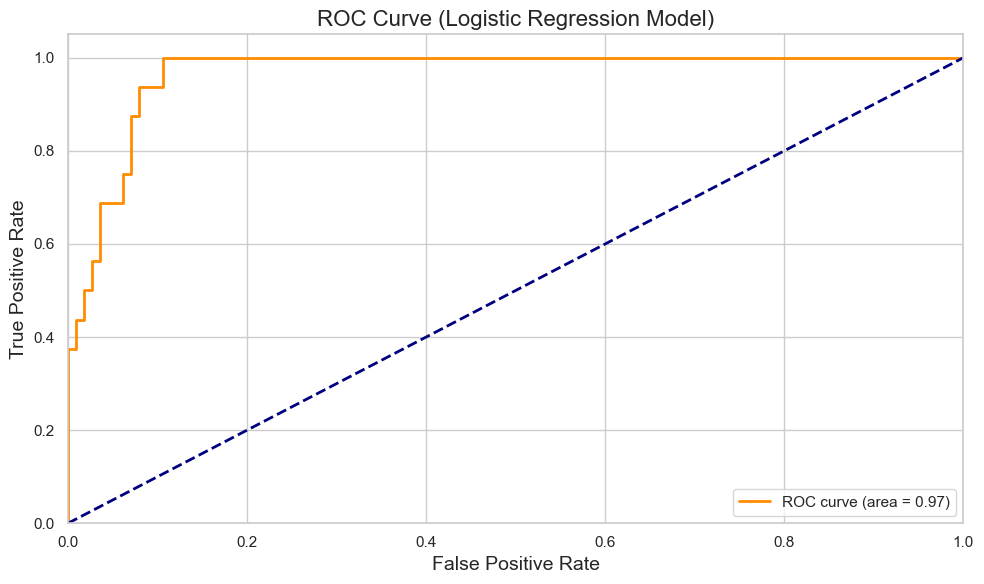

In [19]:
# Compute ROC curve and AUC for the logistic regression model
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, y_val_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot ROC curve for the logistic regression model
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve (Logistic Regression Model)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that the best performance threshold is achieved at around FPR = 1.2

### 3.2.3 Building the Model with the best Threshold

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       113
         1.0       0.57      1.00      0.73        16

    accuracy                           0.91       129
   macro avg       0.79      0.95      0.84       129
weighted avg       0.95      0.91      0.92       129

--------------------------------------------------
  ROC AUC: 0.9679


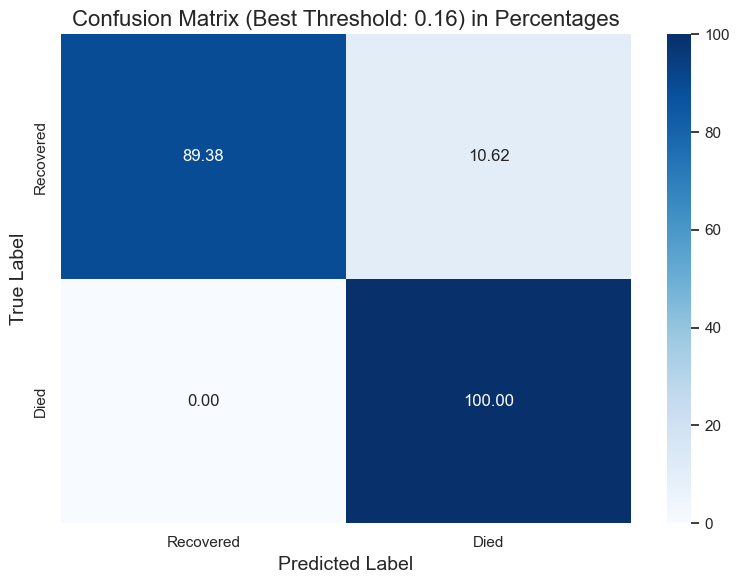

In [20]:
# Assuming 'logreg' is a trained logistic regression model, and X_val, y_val are the validation set

# Step 1: Get the best threshold using the previously defined function
logreg_best_threshold = get_threshold_at_tpr(logreg, X_val, y_val, 1)

# Step 2: Get the predicted probabilities from the model
y_val_prob_logreg = logreg.predict_proba(X_val)[:, 1]

# Step 3: Apply the best threshold to the predicted probabilities
y_val_pred_logreg = (y_val_prob_logreg >= logreg_best_threshold).astype(int)

# Step 4: Calculate the classification metrics for the new predictions
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
precision_logreg = precision_score(y_val, y_val_pred_logreg)
recall_logreg = recall_score(y_val, y_val_pred_logreg)
f1_logreg = f1_score(y_val, y_val_pred_logreg)

# Compute ROC curve and AUC for the new threshold
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, y_val_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


# Print metrics for the best model
print(classification_report(y_val, y_val_pred_logreg))
print("-" * 50)
print(f"  ROC AUC: {roc_auc_logreg:.4f}")

# Optional: Plot confusion matrix for the best threshold
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
cm_percentage_logreg = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis] * 100

# Define class names (adjust based on your dataset's labels)
class_names = ['Recovered', 'Died']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_logreg, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix (Best Threshold: {logreg_best_threshold:.2f}) in Percentages', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()

### 3.2.4 Saving the Model

In [21]:
# Optional: Add metrics to the dictionary and save in a DataFrame
metrics['logreg'] = {
    'model': logreg,
    'threshold': logreg_best_threshold,
    'accuracy': accuracy_logreg,
    'precision': precision_logreg,
    'recall': recall_logreg,
    'f1_score': f1_logreg,
    'roc_auc': roc_auc_logreg
}

## 3.3 Naive Bayes Classifier

### 3.3.1 Building the Base Model

In [22]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predict on validation set
y_val_pred_nb = nb.predict(X_val)
y_val_prob_nb = nb.predict_proba(X_val)[:, 1]

### 3.3.2 ROC Curve and Finding Optimal Threshold

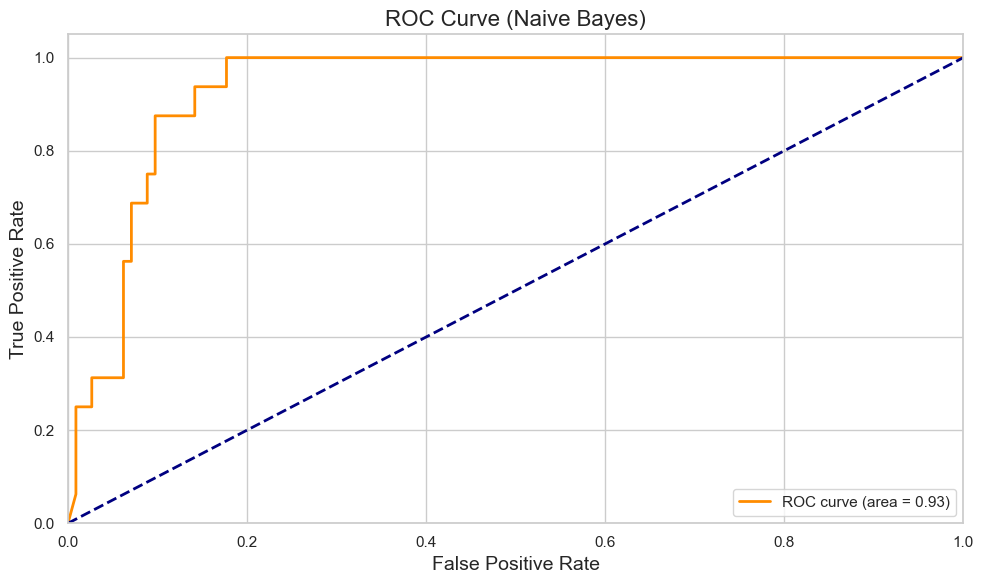

In [23]:
# Compute ROC curve and AUC for Naive Bayes model
fpr_nb, tpr_nb, _ = roc_curve(y_val, y_val_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes model
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve (Naive Bayes)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.3.3 Building the Optimal Model

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90       113
         1.0       0.44      1.00      0.62        16

    accuracy                           0.84       129
   macro avg       0.72      0.91      0.76       129
weighted avg       0.93      0.84      0.87       129

--------------------------------------------------
  ROC AUC: 0.9345


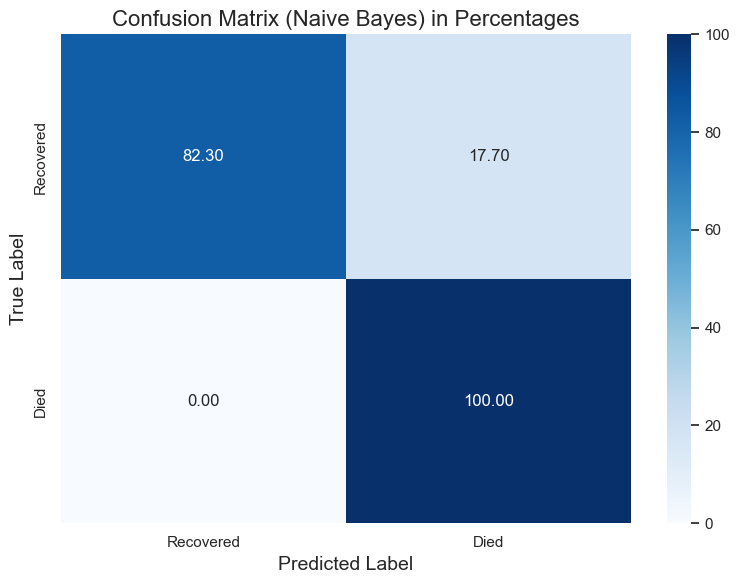

In [24]:
# Step 1: Get the best threshold using the previously defined function
nb_best_threshold = get_threshold_at_tpr(nb, X_val, y_val, 1)

# Step 2: Get the predicted probabilities from the model
y_val_prob_nb = nb.predict_proba(X_val)[:, 1]

# Save metrics for the best model
y_val_pred_nb = (y_val_prob_nb >= nb_best_threshold).astype(int)

# Calculate metrics for the best model
accuracy_best_nb = accuracy_score(y_val, y_val_pred_nb)
precision_best_nb = precision_score(y_val, y_val_pred_nb)
recall_best_nb = recall_score(y_val, y_val_pred_nb)
f1_best_nb = f1_score(y_val, y_val_pred_nb)

# Compute ROC curve and AUC for the best model
fpr_best_nb, tpr_best_nb, _ = roc_curve(y_val, y_val_prob_nb)
roc_auc_nb_best = auc(fpr_best_nb, tpr_best_nb)

# Print metrics for the best model
print(classification_report(y_val, y_val_pred_nb))
print("-" * 50)
print(f"  ROC AUC: {roc_auc_nb_best:.4f}")

# Compute confusion matrix
cm_nb = confusion_matrix(y_val, y_val_pred_nb)

# Convert to percentages
cm_percentage_nb = cm_nb.astype('float') / cm_nb.sum(axis=1)[:, np.newaxis] * 100

# Define class names (adjust based on your dataset's labels)
class_names = ['Recovered', 'Died']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_nb, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Naive Bayes) in Percentages', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()


### 3.3.4 Saving the Model

In [25]:
metrics['naive_bayes'] = {
    'model': nb,
    'threshold': nb_best_threshold,
    'accuracy': accuracy_best_nb,
    'precision': precision_best_nb,
    'recall': recall_best_nb,
    'f1_score': f1_best_nb,
    'roc_auc': roc_auc_nb_best
}

<big><big><big><p style = "text-align:center">End of Phase 1 </p></big></big></big>

## 3.4 Decision Tree

### 3.4.1 Building a Base Model

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Predict on validation set
y_val_pred_dt = dt.predict(X_val)
y_val_prob_dt = dt.predict_proba(X_val)[:, 1]

# Compute accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

# Print accuracy
print(f"Validation Accuracy (Decision Tree): {accuracy_dt:.4f}")

Validation Accuracy (Decision Tree): 0.9845


**OBSERVATIOIN**: Note how powerful tree-based models are. This is just a base model!

### 3.4.2 ROC Curve

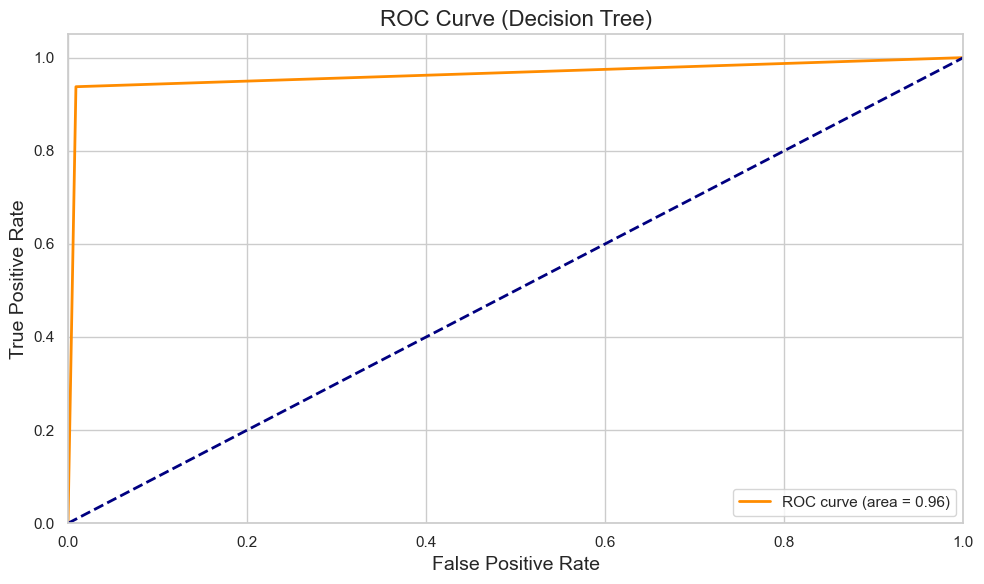

In [27]:
# Compute ROC curve and AUC for Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_val_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree model
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve (Decision Tree)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.4.3 Building the Best Model

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       113
         1.0       0.94      0.94      0.94        16

    accuracy                           0.98       129
   macro avg       0.96      0.96      0.96       129
weighted avg       0.98      0.98      0.98       129

--------------------------------------------------
  ROC AUC: 0.9643


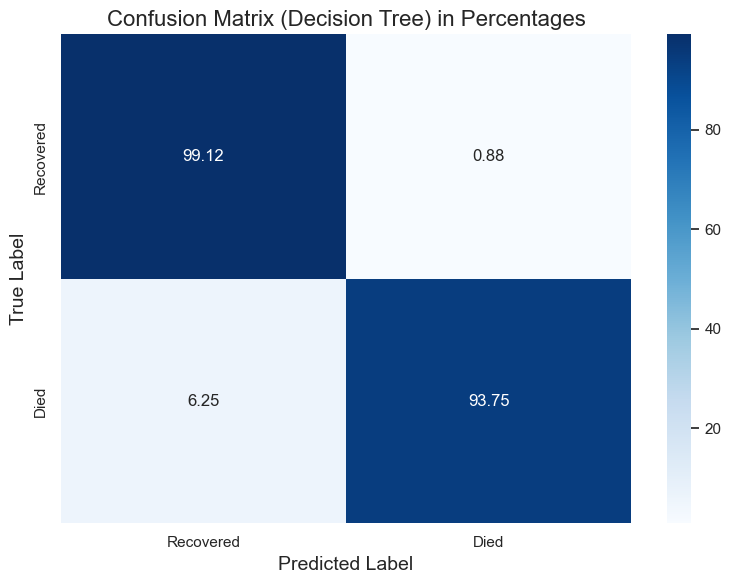

In [28]:
# Step 1: Get the best threshold using the previously defined function
dt_best_threshold = get_threshold_at_tpr(dt, X_val, y_val, 0.9)

# Step 2: Get the predicted probabilities from the model
y_val_prob_dt = dt.predict_proba(X_val)[:, 1]

# Save metrics for the best model
y_val_pred_dt = (y_val_prob_dt >= dt_best_threshold).astype(int)

# Calculate metrics for the best model
accuracy_best_dt = accuracy_score(y_val, y_val_pred_dt)
precision_best_dt = precision_score(y_val, y_val_pred_dt)
recall_best_dt = recall_score(y_val, y_val_pred_dt)
f1_best_dt = f1_score(y_val, y_val_pred_dt)

# Compute ROC curve and AUC for the best model
fpr_best_dt, tpr_best_dt, _ = roc_curve(y_val, y_val_prob_dt)
roc_auc_dt_best = auc(fpr_best_dt, tpr_best_dt)

# Print metrics for the best model
print(classification_report(y_val, y_val_pred_dt))
print("-" * 50)
print(f"  ROC AUC: {roc_auc_dt_best:.4f}")

# Compute confusion matrix
cm_dt = confusion_matrix(y_val, y_val_pred_dt)

# Convert to percentages
cm_percentage_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis] * 100

# Define class names (adjust based on your dataset's labels)
class_names = ['Recovered', 'Died']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_dt, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Decision Tree) in Percentages', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()

### 3.4.4 Saving the Model

In [29]:
metrics['decision_tree'] = {
    'model': dt,
    'threshold': dt_best_threshold,
    'accuracy': accuracy_best_dt,
    'precision': precision_best_dt,
    'recall': recall_best_dt,
    'f1_score': f1_best_dt,
    'roc_auc': roc_auc_dt_best
}

## 3.5 Support Vector Machines (SVM)

### 3.5.1 Building a Base Model

In [30]:
from sklearn.svm import SVC

# Initialize SVM model with probability estimation enabled
svm = SVC(probability=True, random_state=42)

# Fit the model
svm.fit(X_train, y_train)

# Predict on validation set
y_val_pred_svm = svm.predict(X_val)
y_val_prob_svm = svm.predict_proba(X_val)[:, 1]

# Compute accuracy
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

# Print accuracy
print(f"Validation Accuracy (SVM): {accuracy_svm:.4f}")

Validation Accuracy (SVM): 0.9225


### 3.5.2 ROC Curve and Choosing a Threshold

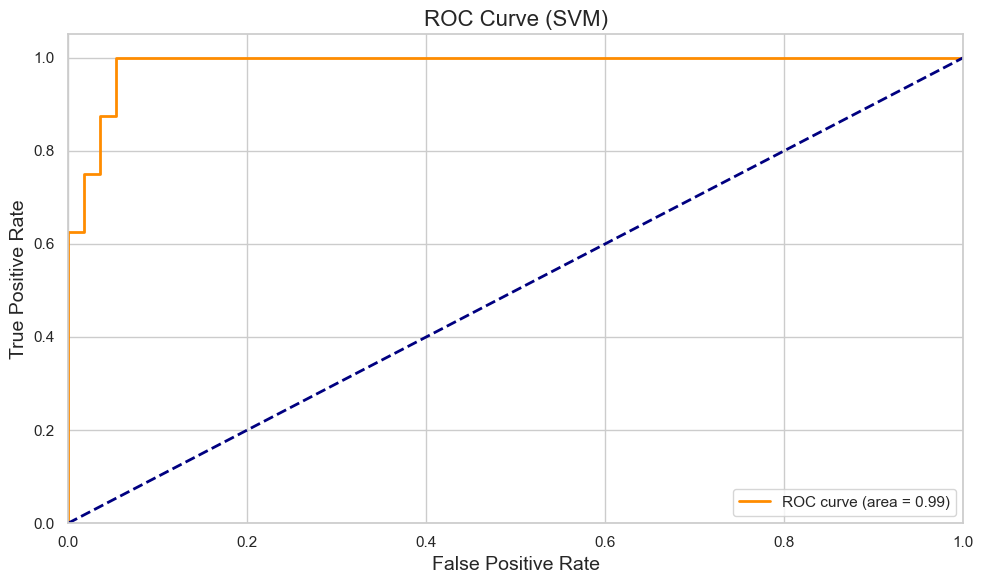

In [31]:
# Compute ROC curve and AUC for SVM model
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM model
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve (SVM)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.5.3 Building the Best Model

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       113
         1.0       0.73      1.00      0.84        16

    accuracy                           0.95       129
   macro avg       0.86      0.97      0.91       129
weighted avg       0.97      0.95      0.96       129

--------------------------------------------------
  ROC AUC: 0.9867


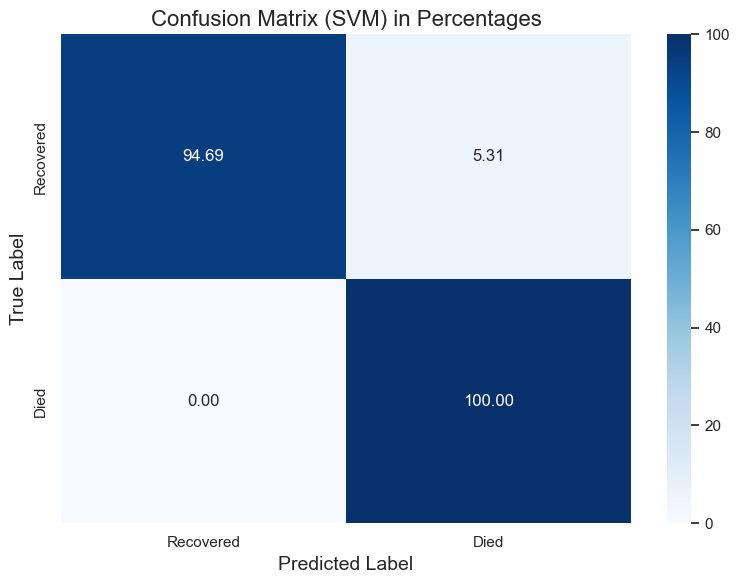

In [32]:
# Step 1: Get the best threshold using the previously defined function
svm_best_threshold = get_threshold_at_tpr(svm, X_val, y_val, 1)

# Step 2: Get the predicted probabilities from the model
y_val_prob_svm = svm.predict_proba(X_val)[:, 1]

# Save metrics for the best model
y_val_pred_svm = (y_val_prob_svm >= svm_best_threshold).astype(int)

# Calculate metrics for the best model
accuracy_best_svm = accuracy_score(y_val, y_val_pred_svm)
precision_best_svm = precision_score(y_val, y_val_pred_svm)
recall_best_svm = recall_score(y_val, y_val_pred_svm)
f1_best_svm = f1_score(y_val, y_val_pred_svm)

# Compute ROC curve and AUC for the best model
fpr_best_svm, tpr_best_svm, _ = roc_curve(y_val, y_val_prob_svm)
roc_auc_svm_best = auc(fpr_best_svm, tpr_best_svm)

# Print metrics for the best model
print(classification_report(y_val, y_val_pred_svm))
print("-" * 50)
print(f"  ROC AUC: {roc_auc_svm_best:.4f}")

# Compute confusion matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Convert to percentages
cm_percentage_svm = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis] * 100

# Define class names (adjust based on your dataset's labels)
class_names = ['Recovered', 'Died']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage_svm, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (SVM) in Percentages', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()

### 3.5.4 Saving The Model

In [33]:
metrics['svm'] = {
    'model': svm,
    'threshold': svm_best_threshold,
    'accuracy': accuracy_best_svm,
    'precision': precision_best_svm,
    'recall': recall_best_svm,
    'f1_score': f1_best_svm,
    'roc_auc': roc_auc_svm_best
}

<big><big><big><p style = "text-align:center">End of Phase 2</p></big></big></big>

# 4. Model Evaluation

## 4.0 Running the Models on Test Data

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# List to store metrics for the bar plot
model_names = []
val_f1_scores = []
test_f1_scores = []
val_recalls = []
test_recalls = []
val_roc_auc = []
test_roc_auc = []
val_accuracies = []
test_accuracies = []

# Loop through each model in the metrics dictionary
for model_name, model_metrics in metrics.items():
# Get the trained model
    model = model_metrics['model']
    
    # Get validation data metrics
    val_f1 = model_metrics['f1_score']
    val_recall = model_metrics['recall']
    val_roc_auc_value = model_metrics['roc_auc']
    val_accuracy = model_metrics['accuracy']  # Assume validation accuracy is already in the metrics dictionary
    
    # Run the model on the test data
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate the test metrics
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc_value = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None
    
    # Save test metrics in the dictionary
    metrics[model_name]['test_f1_score'] = test_f1
    metrics[model_name]['test_recall'] = test_recall
    metrics[model_name]['test_accuracy'] = test_accuracy
    metrics[model_name]['test_roc_auc'] = test_roc_auc_value

    # Append values for plotting
    model_names.append(model_name)
    val_f1_scores.append(val_f1)
    test_f1_scores.append(test_f1)
    val_recalls.append(val_recall)
    test_recalls.append(test_recall)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
    val_roc_auc.append(val_roc_auc_value)
    test_roc_auc.append(test_roc_auc_value)
    
# Create a DataFrame for easier plotting
df_metrics = pd.DataFrame({
    'Model': model_names,
    'Validation Accuracy': val_accuracies,
    'Test Accuracy': test_accuracies,
    'Validation F1 Score': val_f1_scores,
    'Test F1 Score': test_f1_scores,
    'Validation Recall': val_recalls,
    'Test Recall': test_recalls,
    'Validation ROC AUC': val_roc_auc,
    'Test ROC AUC': test_roc_auc
})

## 4.1 F1 Score Summary

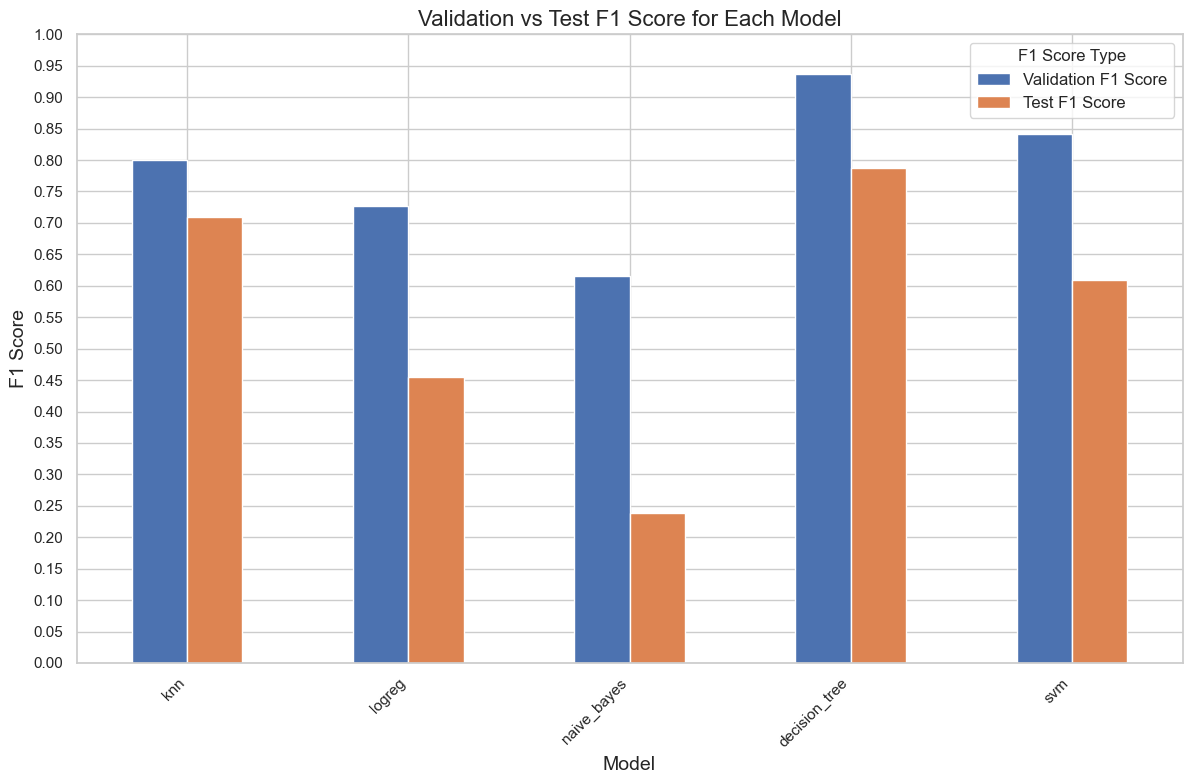

In [35]:
# Barplot for F1 Scores
plt.figure(figsize=(12, 8))
df_metrics.set_index('Model')[['Validation F1 Score', 'Test F1 Score']].plot(kind='bar', figsize=(12, 8), ax=plt.gca())
plt.title('Validation vs Test F1 Score for Each Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='F1 Score Type', fontsize=12)
plt.yticks(np.arange(0, 1.05, 0.05))  # Set yticks with steps of 0.05
plt.grid(True)
plt.show()

## 4.2 Accuracies Summary

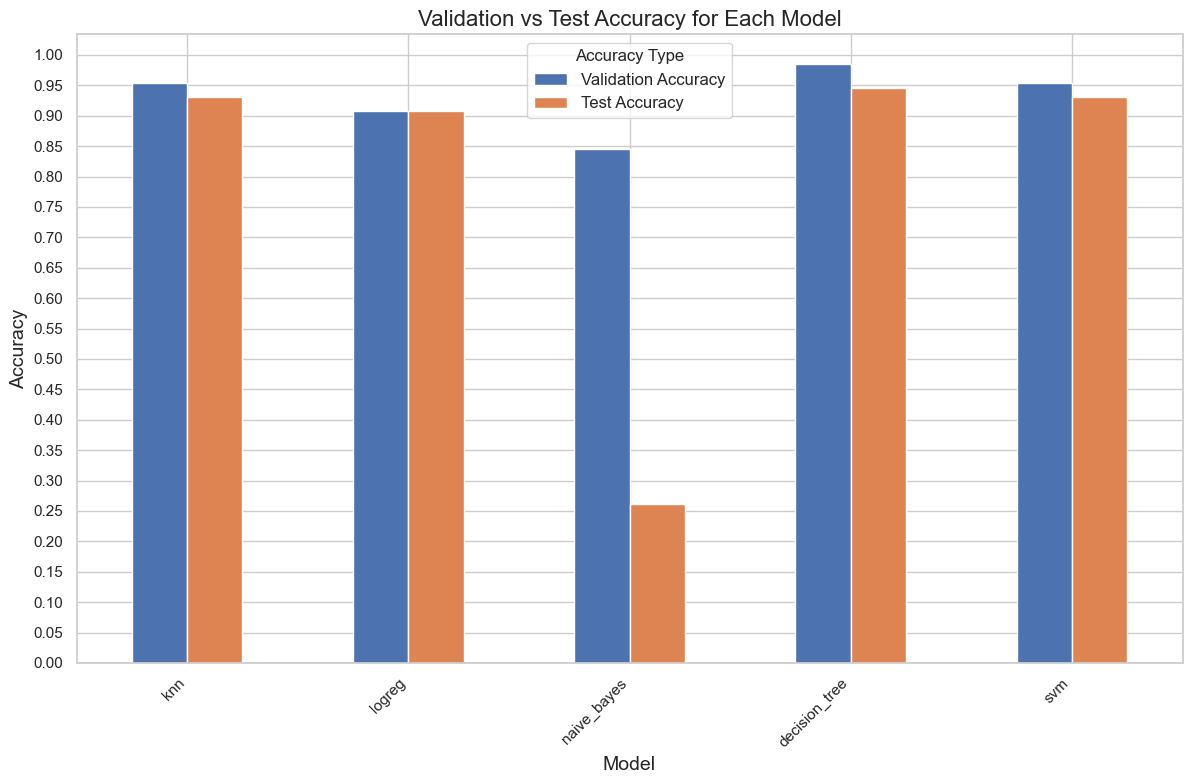

In [36]:
# Barplot for Accuracies
plt.figure(figsize=(12, 8))
df_metrics.set_index('Model')[['Validation Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12, 8), ax=plt.gca())
plt.title('Validation vs Test Accuracy for Each Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Accuracy Type', fontsize=12)
plt.yticks(np.arange(0, 1.05, 0.05))  # Set yticks with steps of 0.05
plt.grid(True)
plt.show()

## 4.3 Recall Summary

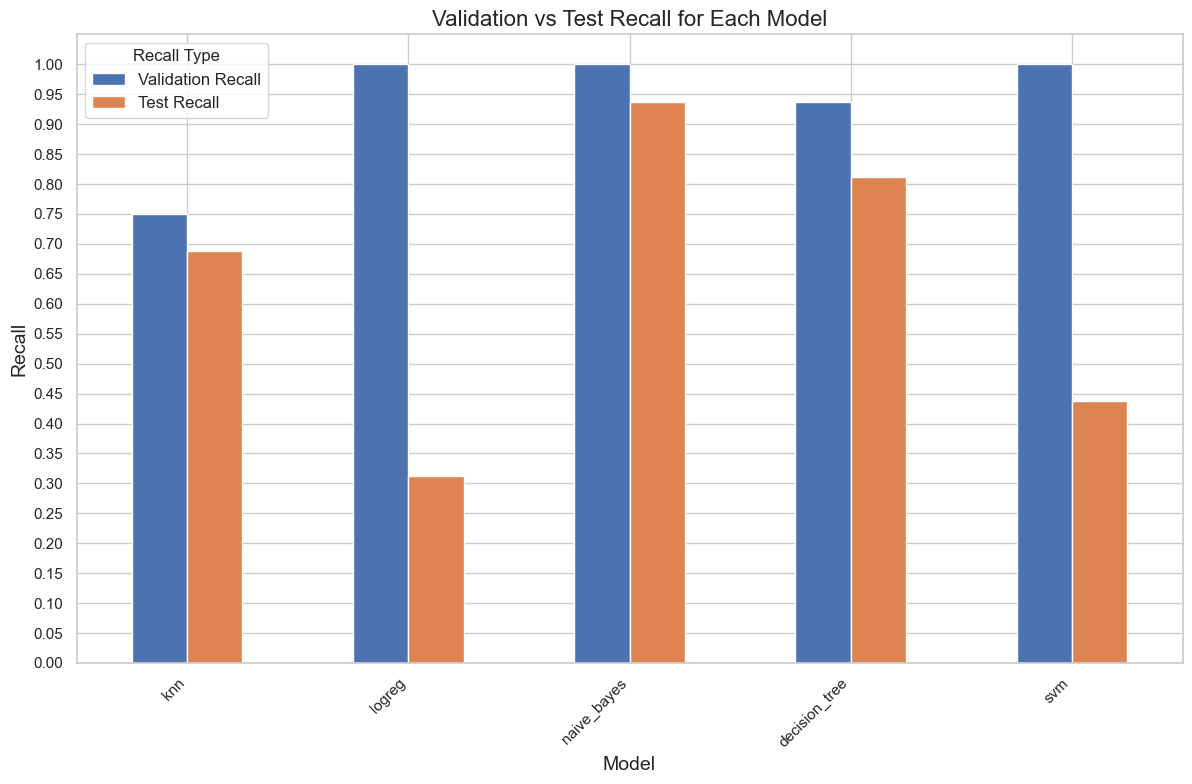

In [37]:
# Barplot for Recall
plt.figure(figsize=(12, 8))
df_metrics.set_index('Model')[['Validation Recall', 'Test Recall']].plot(kind='bar', figsize=(12, 8), ax=plt.gca())
plt.title('Validation vs Test Recall for Each Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Recall Type', fontsize=12)
plt.yticks(np.arange(0, 1.05, 0.05))  # Set yticks with steps of 0.05
plt.grid(True)
plt.show()

## 4.4 Area Under ROC AUC Summary

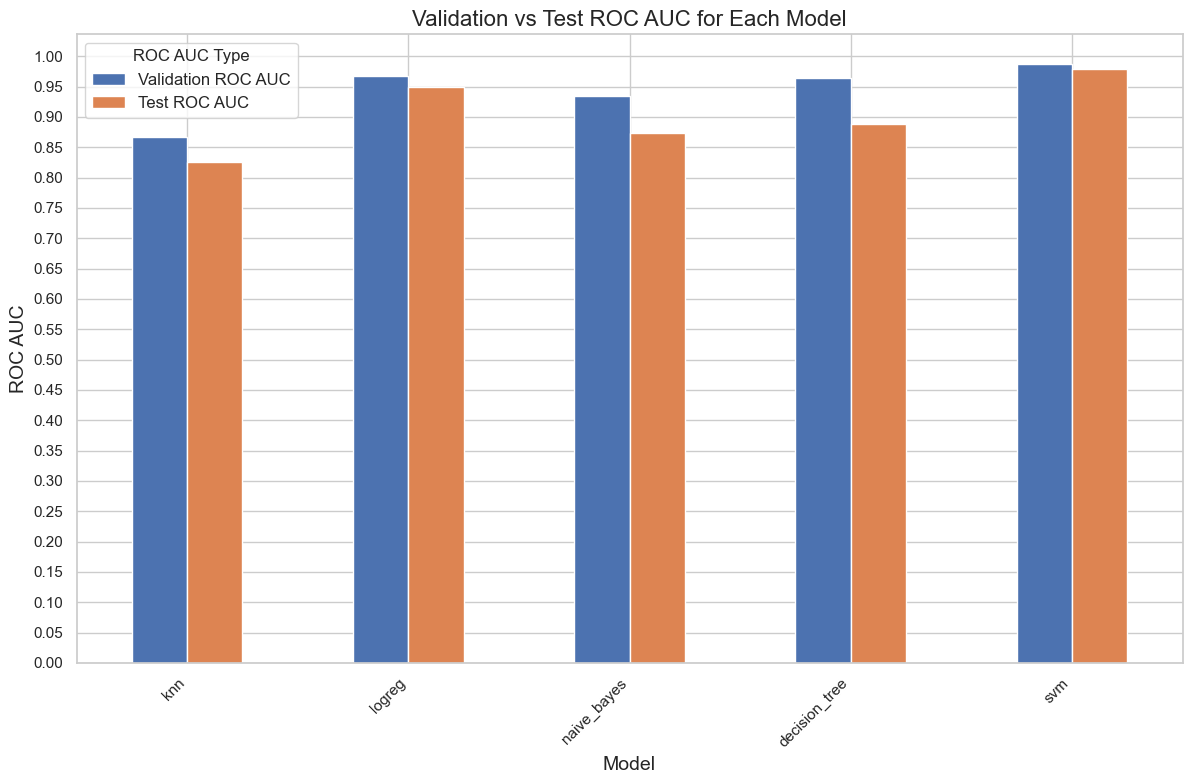

In [38]:
# Barplot for ROC AUC
plt.figure(figsize=(12, 8))
df_metrics.set_index('Model')[['Validation ROC AUC', 'Test ROC AUC']].plot(kind='bar', figsize=(12, 8), ax=plt.gca())
plt.title('Validation vs Test ROC AUC for Each Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('ROC AUC', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='ROC AUC Type', fontsize=12)
plt.yticks(np.arange(0, 1.05, 0.05))  # Set yticks with steps of 0.05
plt.grid(True)
plt.show()

## 4.5 ROC Curves of Different Models for Validation Data

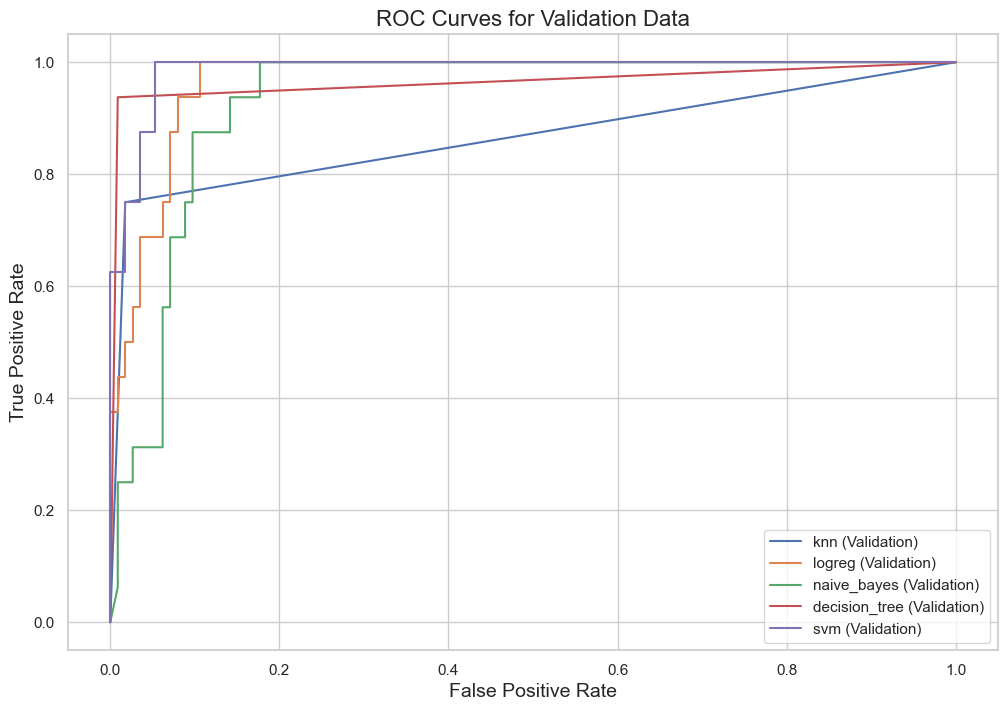

In [39]:
# Plotting the ROC curves
plt.figure(figsize=(12, 8))

# Validation ROC Curves
for model_name, model_metrics in metrics.items():
    model = model_metrics['model']
    y_val_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    if y_val_prob is not None:
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
        plt.plot(fpr_val, tpr_val, label=f'{model_name} (Validation)')

plt.title('ROC Curves for Validation Data', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## 4.6 ROC Curves of Different Models for Test Data

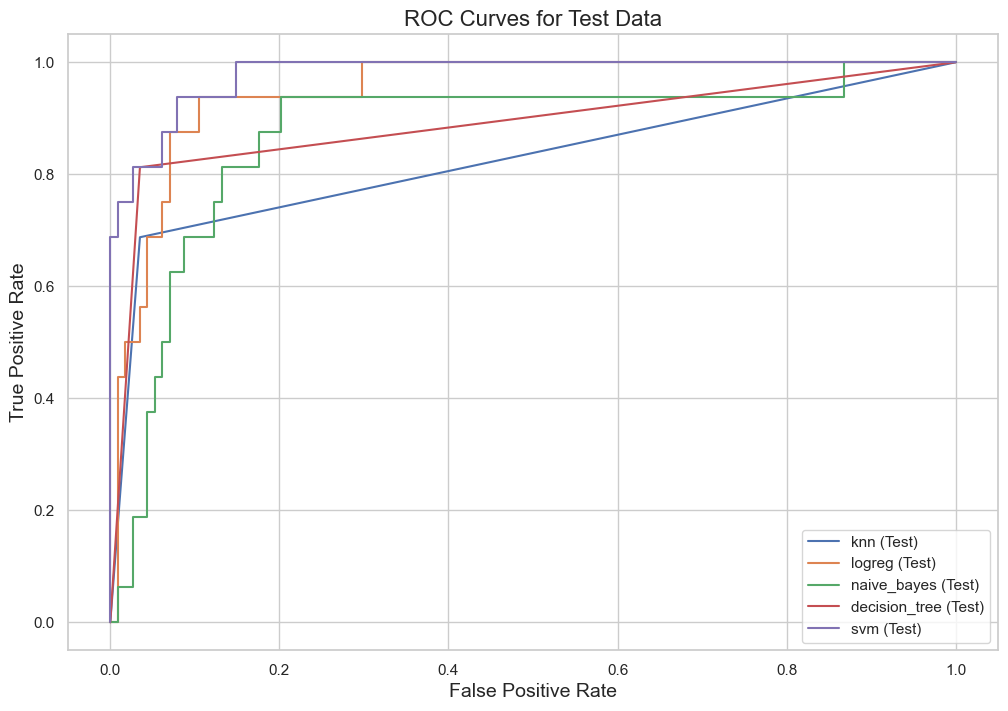

In [40]:
# Test ROC Curves
plt.figure(figsize=(12, 8))

for model_name, model_metrics in metrics.items():
    model = model_metrics['model']
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    if y_test_prob is not None:
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
        plt.plot(fpr_test, tpr_test, label=f'{model_name} (Test)')

plt.title('ROC Curves for Test Data', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()